## Predicting Whether a Patient has Diabetes Based on Health Data Features
###### CS-C3240 Machine Learning, 11/10/2023
##### 1. Introduction
The goal of this project is to develop machine learning models to predict whether a patient has diabetes. This can be used as assistance when determining whether a given patient requires care regarding a particular disease. Predicting chronic diseases is already widely experimented with and has been shown to provide results and actually predict diseases [7]. So the application domain of the project is medical diagnosis, namely classifying patients into “has diabetes” and “does not have diabetes” categories.

The report is started with section 2, problem formulation, which includes presenting the problem and dataset. This is followed by section 3, methodology, including 3.1 data processing followed by first modelling the data with logistic regression in section 3.2 and a decision tree in 3.3. Next in section 4 the report discusses the results and compares the models, finally followed by a conclusion, as section 5, summarising the results and discussing limitations and potential improvements.
##### 2. Problem Formulation
<p style="font-size: 12px">Table 1: Dataset features and explanations</p>

| Feature &emsp; | Explanation &emsp; | Data type &emsp;|
|:--|:--|:--|
|gender|Gender, male / female|String|
|age|Age|Float|
|hypertension|Whether patient has hypertension, 1 / 0|Binary int|
|heart_disease|Whether patient has heart disease, 1 / 0|Binary int|
|smoking_history|Whether patient has smoked or does so currently|String|
|bmi|BMI as a float|Float|
|HbA1c_level|Haemoglobin A1c level|Float|
|blood_glucose_level|Blood glucose level|Float|
|diabetes|Whether patient has diabetes, 1 / 0|Binary int|

The aim of this paper is to determine whether a given patient has diabetes based on a number of factors. The dataset used for the project is compiled for the precise purpose of training machine learning models to identify diabetes based on different factors, which also is where the idea for this project came from, and is from Kaggle and was composed by Mohammed Mustafa and multiple other collaborators [1]. The dataset originally contains 9 features, the features and their explanations are available in Table 1. The dataset is well sourced and actively updated and should be reliable. Similarly, the dataset contains around 100 000 data points, each representing a patient who either has or does not have diabetes, which is more than enough for the training and testing of a model.

Learning is supervised, since the label will be provided to the model with the features. The label or predicted feature will be diabetes and the features are as listed in Table 1, excluding diabetes and, after data preprocessing in section 3.1, smoking history. The ultimate objective of the model is to as accurately as possible predict whether a patient has diabetes. 
##### 3. Methods
##### &emsp; 3.1 Preprocessing and Feature Selection
The dataset, which is from Kaggle [1], contains 100 000 data points with 9 total features. Most features are extremely useful for the project since they contain medical information that is relevant to diabetes. However, smoking habits are missing for around a third of all participants and will hence be left out. An alternative was removing all data points for which smoking habits aren’t defined, but for the aims of this paper it is more sensible to have more training data and develop a more accurate model based on the data available, rather than optimise for the number of features at the potential cost of accuracy. The remaining features are gender, age, hypertension, heart disease, bmi, HbA1c level and blood glucose level.

Another change that was made to make the data more usable was converting string data into binary. In effect this meant transforming the gender feature from string into a binary: ‘Female’ was replaced with 0 and ‘Male’ was replaced with 1. Now the data is in a usable format.
##### &emsp; 3.2 Modelling Using Logistic Regression
The first machine learning model chosen for predicting diabetes is logistic regression. This is a strong classification algorithm which has built in function for multiple features [8]. Maximum iterations had to be increased, the default of 100 was too small for the amount of data points and features in use for the project. For the loss function logistic loss was used, since it is the only option for a loss function when using logistic regression mentioned in the course and lets us use SciKit’s library for logistic regression directly [8]. For the model the solver 'liblinear' was chosen since the task is not a multiclass problem and the dataset is still relatively small and under these conditions liblinear is a sensible choice [8]. This model uses supervised learning.

Feature selection was simple for this method, since all the remaining features after the data processing described in 3.1 are relevant for whether a person has diabetes or not in an actual medical sense - this is why they are included in the dataset originally [1]. So the features are gender, age, hypertension, heart disease, bmi, HbA1c level and blood glucose level. The label is diabetes.

The data was split into training, testing and validation sets with a 80-10-10 split, which is a solid standard option for machine learning projects [10]. The split was chosen to optimise for larger training data without neglecting testing and validation. The sets are constructed at random using random_state with an arbitrary integer, in this case 12 [5]. The validation set was used to test differences between different penalties, which were l1 and l2 since they are the penalties available for the liblinear solver in SciKit [8]. l2 gave a better validation accuracy and was hence chosen as the penalty. 

##### &emsp; 3.3 Modelling Using a Decision Tree
The second machine learning model chosen for predicting diabetes is a decision tree. Decision trees were chosen for their ability to classify items in clear buckets well, as well as for their ease of interpretation and ease of validation [2]. The chosen loss function is Gini impurity, since it appears to be slightly better suited for simpler variables [4]. It is also slightly simpler to implement using Scikit [3]. This model uses supervised learning.

Feature selection was done with similar logic to logistic regression. As explained in 3.2, all the features left after data processing in section 3.1 are relevant to medically predicting diabetes and hence kept. Here, too, the features are gender, age, hypertension, heart disease, bmi, HbA1c level and blood glucose level. The label is diabetes.

The data was split into training and testing sets similarly to the logistic regression model in 3.2, or rather by using the same sets. This means a 80-10-10 split between training, validation and testing with random_state = 12. The amount of data is quite large for a decision tree compared to the number of features, so the same split should work well and allows us to use the same testing set for both models. The validation set was used to find the optimal maximum depth of the decision tree, which was found to be 8.
##### 4. Results
<p style="font-size: 12px">Image 1: Confusion matrices of both models' testing data predictions, different accuracies in titles.</p>

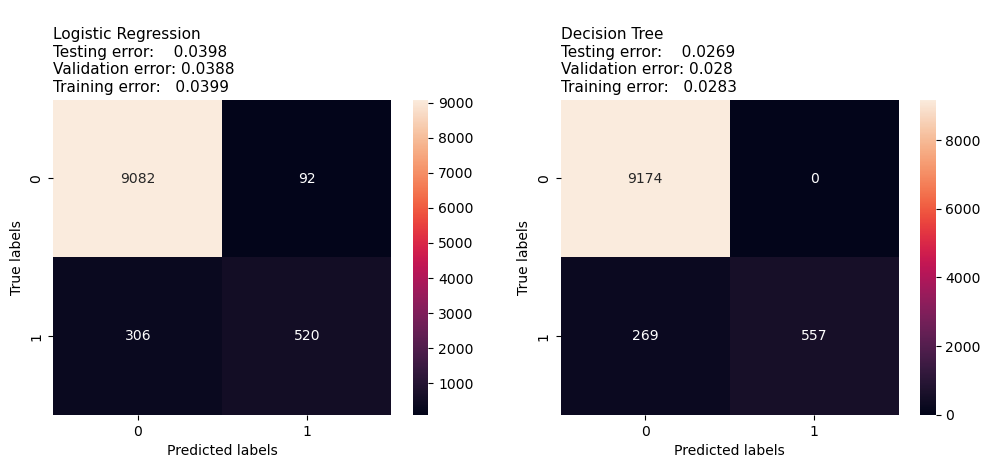

The errors were computed using accuracy score [9] with the formula 1 - accuracy score = error. We see that for the logistic regression model the validation error is slightly higher than the testing and training errors, which are roughly equal. The training error is the smallest by a slight margin, which is also to be expected since the model is most familiar with its' training data. With a difference between all errors being this small, the model can be considered well fitted, or to generalize well. If the differences were larger the model would have likely overfitted to the training data. For the decision tree the same applies. The testing error is lowest followed by the validation error and then testing error, implying that the model is well fitted and works, especially since all errors are roughly equal. The decision tree also has a slightly lower testing error overall, which is preferable.

A more interesting comparison arises from the confusion matrices, which are drawn on predictions from the testing data. From the confusion matrices we see that the decision tree did not provide a single false positive. Assuming that this would be true for any number of testing data points, this would allow the model to be used as a substitute for medical diabetes testing in certain scenarios. If a doctor thinks a patient might have diabetes, the patient's data could be fed into the model and, given the model returns a 1, the result could be trusted. This would reduce the necessity of actual medical diabetes testing. A 0 result could not be trusted and an actual medical test could still be necessary, since the model gives false negatives. Of course for this method to be used in real-life situations a significantly more elaborate testing process should take place and likely a more exhaustive model would be used. Overall this, the better accuracy and the underfitting of the logistic regression model lead to the decision tree being a superior method to logistic regression for predicting diabetes in patients using the features provided by this dataset, with this report’s setup.

The test set was the same for both models, containing 10% of the total data from the data set at random using train_test_split as explained in sections 3.2 and 3.3. This testing data was not used in the training or validation sets and was only used to test the models after training and validation. The average test loss of the final chosen method, the decision tree, is visible in Image 1 as average test error, 0.0269.
##### 5. Conclusion
The report aimed to predict whether a given patient has diabetes using a number of features. The methods that were tried and compared were decision trees and logistic regression. Out of these two the report concludes that decision trees seem to be slightly better with regards to testing error, decision tree's error of 0.0269 is lower than the logistic regression model's 0.0398, and significantly better considering that they do not give false positives. Both models were overall very accurate and generalized well, judging from the small differences between errors, the average loss was also very low. The most significant positive is the lack of false positives in the chosen method, the decision tree.

The obtained results are relatively good, however an even more accurate model would of course be preferable. Adding new features could potentially help, as well as a larger data set. A future direction for this study could include methods such as random forests being used, since a single decision tree already works extremely well a random forest might have the potential to further improve prediction accuracy. 

<div style="page-break-after: always;"></div>

##### Bibliography

[1] Mohammed Mustafa et al.,Kaggle,  2023, “Diabetes prediction dataset”, Accessed 21.9.2022. Available at www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

[2] Scikit learn, “1.10. Decision Trees”, Accessed 22.9.2022. Available at  scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

[3] Scikit learn, “sklearn.tree.DecisionTreeClassifier”, Accessed 22.9.2022. Available at scikit-learn.org/stable/modules/tree.html

[4] Vijaysinh Lendave, Analytics India Magazine,  2021, “Gini Impurity vs Information Gain vs Chi-Square – Methods for Decision Tree Split”, Accessed 22.9.2023. Available at analyticsindiamag.com/gini-impurity-vs-information-gain-vs-chi-square-methods-for-decision-tree-split/

[5] Scikit learn, “sklearn.model_selection.train_test_split”, Accessed 22.9.2022. Available at scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

[6] Uri Almog, Towards Data Science, 2022, “Decision Trees, Explained”, Accessed 22.9.2023. Available at towardsdatascience.com/decision-trees-explained-d7678c43a59e

[7] F M Delpino,   K Costa, S R Farias, A D P Chiavegatto Filho, R A Arcêncio, B P Nunes, 2022, “Machine learning for predicting chronic diseases: a systematic review”, Accessed 9.10.2023, Available at pubmed.ncbi.nlm.nih.gov/35219838/

[8] Scikit learn, “sklearn.linear_model.LogisticRegression”, Accessed 9.10.2023, Available at scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

[9] Scikit learn, “sklearn.metrics.accuracy_score”; Accessed 10.10.2023, Available at scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

[10] Pragati Baheti, "Train Test Validation Split: How To & Best Practices [2023]", Accessed 11.10.2023, Available at www.v7labs.com/blog/train-validation-test-set


<div style="page-break-after: always;"></div>

##### Appendix

In [1]:
# Importing necessary packages and functions
from os import getcwd
from pandas import read_csv
from seaborn import heatmap
from matplotlib.pyplot import subplot, figure
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.linear_model import LogisticRegression

In [2]:
# Function returning 0 for 'Female' and 1 for 'Male'
def GenderToBinary(value): 
    if value == 'Female':
        return 0
    return 1

In [3]:
# Fetch data and modify it to fit the project
filename = 'diabetes_prediction_dataset.csv'
df = read_csv(getcwd() + '/' + filename).drop(['smoking_history'], axis = 1)
df['gender'] = df['gender'].apply(GenderToBinary)
df.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,25.19,6.6,140,0
1,0,54.0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,23.45,5.0,155,0
4,1,76.0,1,1,20.14,4.8,155,0


In [4]:
# Split into training, validation and testing data
random_state = 12
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['diabetes'], axis = 1), 
    df['diabetes'], 
    test_size = 0.2,
    random_state = random_state
)

X_validation, X_test, y_validation, y_test = train_test_split(
    X_test,
    y_test,
    test_size = 0.5,
    random_state = random_state
)

In [5]:
# Find optimal max depth for decision tree using a for loop from 0 to 20
best_max_depth = 0
best_validation_accuracy_DTree = 0

for max_depth in range(1, 20):
    # Make decision tree, fit trainnig data and compare validation accuracy
    clf_DTree = DecisionTreeClassifier(
        criterion = 'gini', 
        max_depth = max_depth
    ).fit(X_train, y_train)
    
    y_validation_pred = clf_DTree.predict(X_validation)
    validation_accuracy = accuracy_score(y_validation, y_validation_pred)
    
    if validation_accuracy > best_validation_accuracy_DTree:
        best_max_depth = max_depth
        best_validation_accuracy_DTree = validation_accuracy

print("Best validation accuracy: ", best_validation_accuracy_DTree)
print("Best max depth: ", best_max_depth)

Best validation accuracy:  0.972
Best max depth:  2


In [6]:
# Make decision tree and fit training data
clf_DTree = DecisionTreeClassifier(
    criterion = 'gini', 
    max_depth = best_max_depth
).fit(X_train, y_train)

# Predict values based on testing data
y_pred_DTree = clf_DTree.predict(X_test)
train_y_pred_DTree = clf_DTree.predict(X_train)

# Measure accuracy
accuracy_DTree = accuracy_score(y_test, y_pred_DTree)
training_accuracy_DTree = accuracy_score(y_train, train_y_pred_DTree)
print('Decision tree testing accuracy:  ', accuracy_DTree)
print('Decision tree training accuracy: ', training_accuracy_DTree)

Decision tree testing accuracy:   0.9731
Decision tree training accuracy:  0.9717


In [7]:
# Finding the best penalty
best_penalty = None
best_validation_accuracy_LogReg = 0

for penalty in ['l1', 'l2']:
    # test penalties against validation set and determine the best one
    clf_LogReg = LogisticRegression(
        max_iter = 5000,
        solver = 'liblinear',
        penalty = penalty
    ).fit(X_train, y_train)
    
    y_validation_pred = clf_LogReg.predict(X_validation)
    validation_accuracy = accuracy_score(y_validation, y_validation_pred)
    
    if validation_accuracy > best_validation_accuracy_LogReg:
        best_penalty = penalty
        best_validation_accuracy_LogReg = validation_accuracy

print("Best validation accuracy: ", best_validation_accuracy_LogReg)
print("Best penalty: ", best_penalty)

Best validation accuracy:  0.9612
Best penalty:  l1


In [8]:
# Make Logistic Regression and fit training data
clf_LogReg = LogisticRegression(
    max_iter = 5000,
    solver = 'liblinear',
    penalty = best_penalty
).fit(X_train, y_train)

# Predict values based on testing data
y_pred_LogReg = clf_LogReg.predict(X_test)
train_y_pred_LogReg = clf_LogReg.predict(X_train)

# Measure accuracy
accuracy_LogReg = accuracy_score(y_test, y_pred_LogReg)
training_accuracy_LogReg = accuracy_score(y_train, train_y_pred_LogReg)
print('Logistic Regression testing accuracy: ', accuracy_LogReg)
print('Logistic Regression training accuracy: ', training_accuracy_LogReg)

Logistic Regression testing accuracy:  0.9602
Logistic Regression training accuracy:  0.9601


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

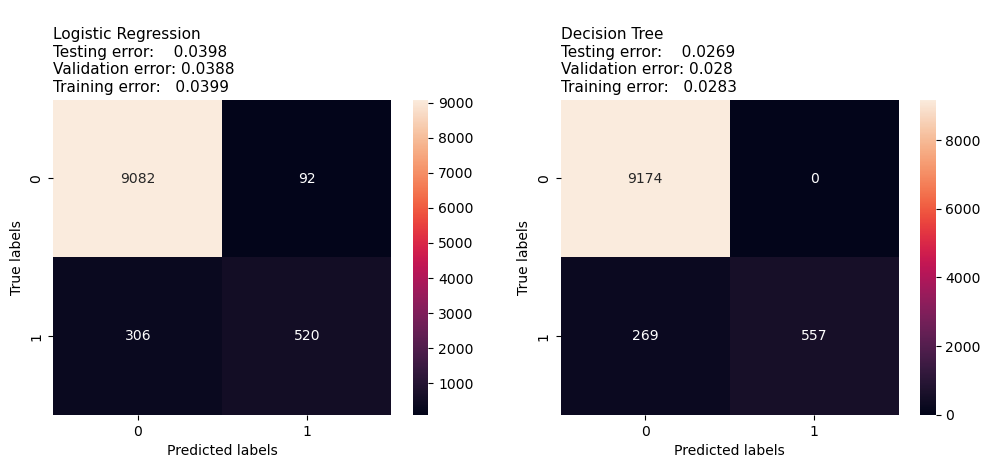

In [9]:
# Plotting both decision trees side by side with accuracy in title
figure(num = 'Testing Confusion Matrices', figsize = (12, 9))
ax1 = subplot(2,2,1)
conf_matrix_LogReg = confusion_matrix(y_test, y_pred_LogReg)
heatmap(conf_matrix_LogReg, annot=True, fmt='g', ax=ax1)
ax1.set_title(
    '\nLogistic Regression' + 
    '\nTesting error:    ' + str(round(1 - accuracy_LogReg, 5)) + 
    '\nValidation error: ' + str(round(1 - best_validation_accuracy_LogReg, 5)) +
    '\nTraining error:   ' + str(round(1 - training_accuracy_LogReg, 5)), 
    fontsize = 11,
    loc = 'left'
)
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.xaxis.set_ticklabels(['0', '1'])
ax1.yaxis.set_ticklabels(['0', '1'])

ax2 = subplot(2,2,2)
conf_matrix = confusion_matrix(y_test, y_pred_DTree)
heatmap(conf_matrix, annot=True, fmt='g', ax=ax2)
ax2.set_title(
    'Decision Tree' + 
    '\nTesting error:    ' + str(round(1 - accuracy_DTree, 5)) + 
    '\nValidation error: ' + str(round(1 - best_validation_accuracy_DTree, 5)) +
    '\nTraining error:   ' + str(round(1 - training_accuracy_DTree, 5)), 
    fontsize = 11,
    loc = 'left'
)
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.xaxis.set_ticklabels(['0', '1'])
ax2.yaxis.set_ticklabels(['0', '1'])